In [1]:
import os, sys
os.environ['ON_PY']="1"
from params import parser
from common_utils import setup_seed
from data_utils import pack_data_from_config
import numpy as np
from test_script.base import Test
import matplotlib.pyplot as plt
import numpy as np

notebook_dir = os.getcwd()
print(notebook_dir)
# 将工作目录更改为上一级目录
os.chdir("/home/wlc/FJSP-DRL-MAML")


(CVXPY) Aug 14 11:46:16 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Aug 14 11:46:16 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


/home/wlc/miniconda3/envs/RL-torch/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/wlc/miniconda3/envs/RL-torch/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda9SetDeviceEi'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


/home/wlc/FJSP-DRL-MAML/plot_imgs


In [2]:


timing = "2024-08-12T15-38-43"

(1500,)


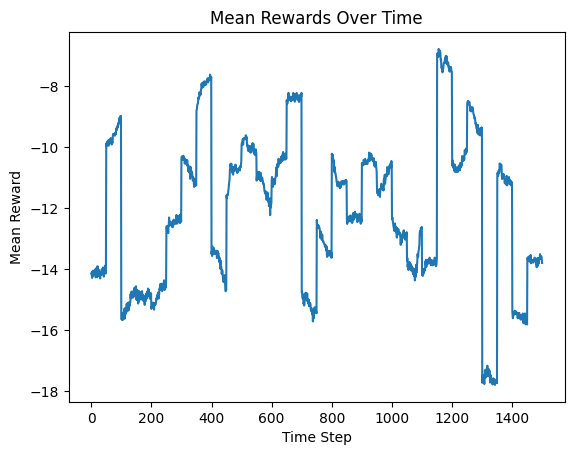

In [3]:

filename = "mean_rewards"+timing
def rewards_plot(filename):
    with open(f"./train_log/{filename}", "r") as f:
        rewards = eval(f.read())
    rewards = np.array(rewards).astype(np.float64)
    time_steps = np.arange(rewards.shape[0])
    print(rewards.shape)
    plt.plot(rewards)
    # plt.fill_between(time_steps, rewards.min(axis=-1), rewards.max(axis=-1), color='gray', alpha=0.3, label='Min-Max Range')

    # 添加标题和轴标签
    plt.title('Mean Rewards Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Mean Reward')

    # 显示图表
    plt.show()


rewards_plot(f"mean_rewards{timing}.txt")


(3, 1500)


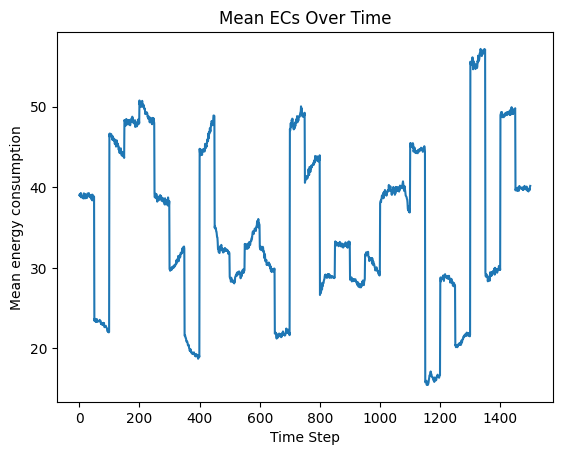

In [4]:

def EC_plot(filename):
    with open(f"./train_log/{filename}", "r") as f:
        Ecs = eval(f.read())
    Ecs = np.array(Ecs).astype(np.float64)
    mean_Ecs = np.mean(Ecs, axis=0)
    time_steps = np.arange(Ecs.shape[0])
    print(Ecs.shape)
    plt.plot(mean_Ecs)
    # plt.fill_between(time_steps, rewards.min(axis=-1), rewards.max(axis=-1), color='gray', alpha=0.3, label='Min-Max Range')

    # 添加标题和轴标签
    plt.title('Mean ECs Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Mean energy consumption')

    # 显示图表
    plt.show()


EC_plot(f"EC{timing}.txt")


(3, 1500)


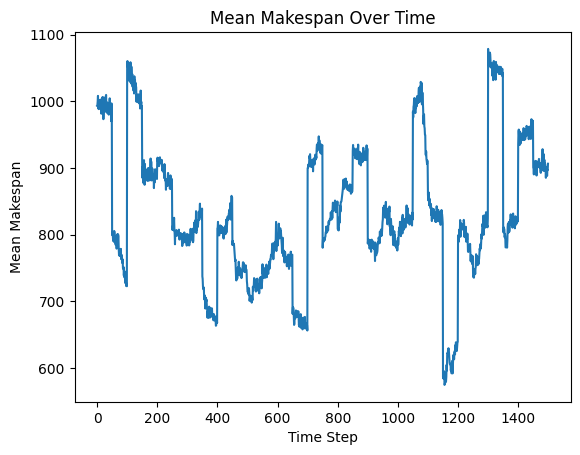

In [5]:

filename = f"makespans{timing}"
with open(f"./train_log/{filename}.txt", "r") as f:
    Ecs = eval(f.read())
    Ecs = np.array(Ecs).astype(np.float64)
    mean_Ecs = np.mean(Ecs, axis=0)
    time_steps = np.arange(Ecs.shape[0])
    print(Ecs.shape)
    plt.plot(mean_Ecs)
    # plt.fill_between(time_steps, rewards.min(axis=-1), rewards.max(axis=-1), color='gray', alpha=0.3, label='Min-Max Range')

    # 添加标题和轴标签
    plt.title('Mean Makespan Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Mean Makespan')

    # 显示图表
    plt.show()


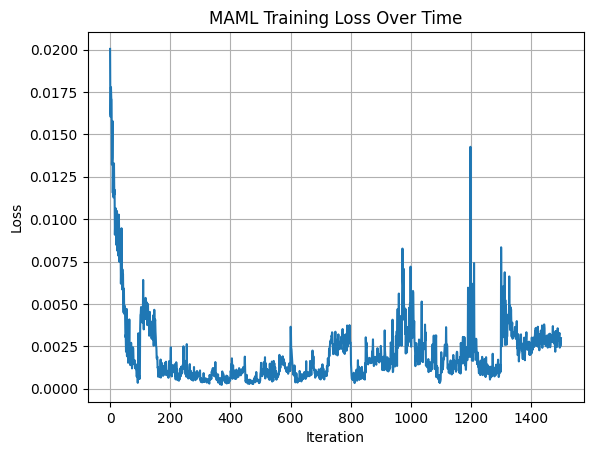

In [6]:
filename = f"meta_loss{timing}.txt"
# 读取文件中的数据
with open(f'./train_log/{filename}', 'r') as file:
    data = file.read()

# 将字符串数据转换为Python列表
losses = eval(data)

# 绘制损失曲线
plt.plot(losses)
plt.title('MAML Training Loss Over Time')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
